## **Tidy Data Project** 
The notebook aims to demonstrate how to import, tidy, and visualize data from the [**2008 Summer Olympic Games**](https://edjnet.github.io/OlympicsGoNUTS/2008/). It walks through the process of reshaping the original dataset (which is in a wide format) into a long format that adheres to the principles of tidy data. This transformation makes the data easier to filter, group, and analyze using the Pandas library. 

**What is Tidy Data**
Tidy data is a way of organizing data that makes it easier to analyze and visualize. It follows a specific structure that is consistent and predictable, making data manipulation more straightforward. Tidy data is important because it makes data analysis and visualization more efficient and intuitive. Reference: [**Tidy Data**](https://vita.had.co.nz/papers/tidy-data.pdf)

*The key principles of tidy data include the following:*
- Each variable forms a column: Every column in the dataset represents a specific variable or attribute.
- Each observation forms a row: Every row contains a single observation or record.
- Each type of observational unit forms a cell: Different types of data (e.g., athletes, events, results) are stored in separate cells.

In short, tidy data makes the data analysis process more organized, reliable, and efficient!

### Loading the Necessary Libraries & Olympics Dataset
Load the Pandas library which makes data analysis and manipulation easy and efficient, allowing one to work with large datasets in fewer lines of code. References to the [**Pandas Cheat Sheet**](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) can make this process even more efficient. 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
olympic_df = pd.read_csv('olympics_08_medalists.csv')

# Display initial dataset information
print("Initial dataset shape:", olympic_df.shape)
display(olympic_df.head())

Initial dataset shape: (1875, 71)


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Provide the summary statistics for the initial data
print(f"Summary Statistics for Initial Data:")

# Count the total number of athletes and their sports categories
print(f"Total athletes: {len(olympic_df)}")
print(f"Total events: {len(olympic_df.columns)}")

# Display summary statistics
olympic_df.describe()

Summary Statistics for Initial Data:
Total athletes: 1875
Total events: 71


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
count,1875,11,9,85,81,12,10,72,35,36,...,6,36,36,39,39,24,21,28,16,27
unique,1875,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,Živko Gocić,bronze,bronze,silver,silver,silver,silver,silver,bronze,bronze,...,gold,bronze,gold,silver,gold,gold,bronze,bronze,bronze,bronze
freq,1,4,4,31,28,4,4,24,12,12,...,2,12,12,13,13,8,7,14,8,13


In [116]:
# Display the counts of missing values
print("Missing Values:")
olympic_df.isnull().sum()

Missing Values:


medalist_name                    0
male_archery                  1864
female_archery                1866
male_athletics                1790
female_athletics              1794
                              ... 
male_weightlifting            1851
female_weightlifting          1854
male_freestyle wrestling      1847
female_freestyle wrestling    1859
male_greco-roman wrestling    1848
Length: 71, dtype: int64

### Initial Data Observations ### 
- The dataset has 1,875 rows and 71 columns.
- Each row represents an athlete, and each column represents an event. 

The data is in a wide format, where each column (after the medalist name) represents a specific combination of gender and sport/event. Most columns contain a significant number of missing values (NaN), indicating the sports categories in which the particular athlete did not place (occupying the majority of the data points). All columns are of object type (either strings or categorical data). The values in event columns indicate medal types (like gold, silver, bronze) or NaN if the athlete did not win a medal in that event. 

*Key Issues and Next Steps:*
- The dataset should be reshaped from wide to long format to make it tidy. 
- Instead of separate columns for each sport/gender combination, it may be better to have columns for "Event", "Gender", and "Medal". 
- The NaN values can be eliminated once the data is reshaped properly.
- Some column names contain spaces and inconsistent formatting, which could be improved. 


### Data Cleaning & Tidy Process ###
This transformation makes data analysis, visualization, and manipulation significantly easier and more efficient. The code takes a wide-format dataset of Olympic medalists and transforms it into a tidy, long-format dataset. Initially, the dataset has one column for each sport-gender combination, making it difficult to analyze and visualize. 

The code uses the pd.melt() function to reshape the data, converting multiple columns into two key columns: "Event" and "Medal". It then separates the combined gender and event information into separate columns, making the data more structured and easy to work with. 

The final result is a cleaned and organized dataset where each row represents a single observation (a medalist, their gender, each of the events they participated in, and the medal if they won). This format makes the data ideal for analysis, aggregation, and visualization.

In [117]:
# Create a list for the sports categories
sports_list = list(olympic_df.columns)[1:]

# Use pd.melt() to convert "wide" data to "long" data
olympic_df_melted = pd.melt(olympic_df,
                            id_vars="medalist_name",
                            value_vars=sports_list,
                            var_name="Event",
                            value_name="Medal")

olympic_df_melted.head()

# Use str.split() to separate the 'event' column into events based on gender
olympic_df_melted[['Gender', 'Event']] = olympic_df_melted['Event'].str.split('_', expand=True)

# Create a cleaned copy of the dataset
olympic_df_clean = olympic_df_melted.copy()

# Display the cleaned dataset
olympic_df_clean

,medalist_name,Event,Medal,Gender
0,Aaron Armstrong,archery,NaN,male
1,Aaron Peirsol,archery,NaN,male
2,Abdullo Tangriev,archery,NaN,male
3,Abeer Abdelrahman,archery,NaN,male
4,Abhinav,archery,NaN,male
...,...,...,...,...
131245,Éver Banega,greco-roman wrestling,NaN,male
131246,Ólafur Stefánsson,greco-roman wrestling,NaN,male
131247,Óscar Brayson,greco-roman wrestling,NaN,male
131248,Łukasz Pawłowski,greco-roman wrestling,NaN,male


## Visualization ##
Data visualization is the graphical representation of information and data. Visual elements such as charts, graphs, maps, and plots are used to make data more understandable and accessible. The goal is to communicate information clearly and efficiently by transforming complex data into visual insights. As discussed throughout this introductory course, visualization is just as important, if not more, in effectively communicating information and it is important to take into consideration certain ethical and possibly biased implications. 

Data visualization turns data into a visual story that is easier to understand, interpret, and act upon. It bridges the gap between raw data and actionable insights, making it an essential tool in data analysis and presentation. 

Below are two examples of potential visualizations from the provided data. 
1. Olympic Medal Counts by Event:

This visualization represents the number of medals awarded in each sports category by each type. It utilizes  a stacked bar chart to visualize the number of gold, silver, and bronze medals won per Olympic event. It uses Pandas to create a summary table and Matplotlib with Seaborn to plot the data. The resulting chart makes it easy to compare medal distributions across different sports. Through this, one can observe that the "athletics" sports category awarded one of the most medals while other sports such as "archery" awarded very few comparatively. (It is important to recognize shortcomings in data visualizations in order to adequately address them. Some ways to improve this visual might be to color-coordinate the bar charts to their corresponding medal type; also provide a visual indicator of the counts for the total medals in each sports category; and/or reorder the bars in ascending total medal count.)

2. Medal Proportions by Gender in Olympic Event: 

This stacked bar graph visualizes the number of medals awarded by sport during the 2008 Olympics, with a breakdown of medals by gender. Each bar in the graph represents a different sport, and the height of each bar indicates the total number of medals awarded in that sport. The bar segments are color-coded to distinguish between male and female athletes, allowing for a clear comparison of gender distribution within each sport. It seems that for the sports in which both men and women compete, the same number of overall medals are awarded, but the bar graph also demonstrates that there a a certain few sports which only feature one gender. 




<Figure size 1200x800 with 0 Axes>

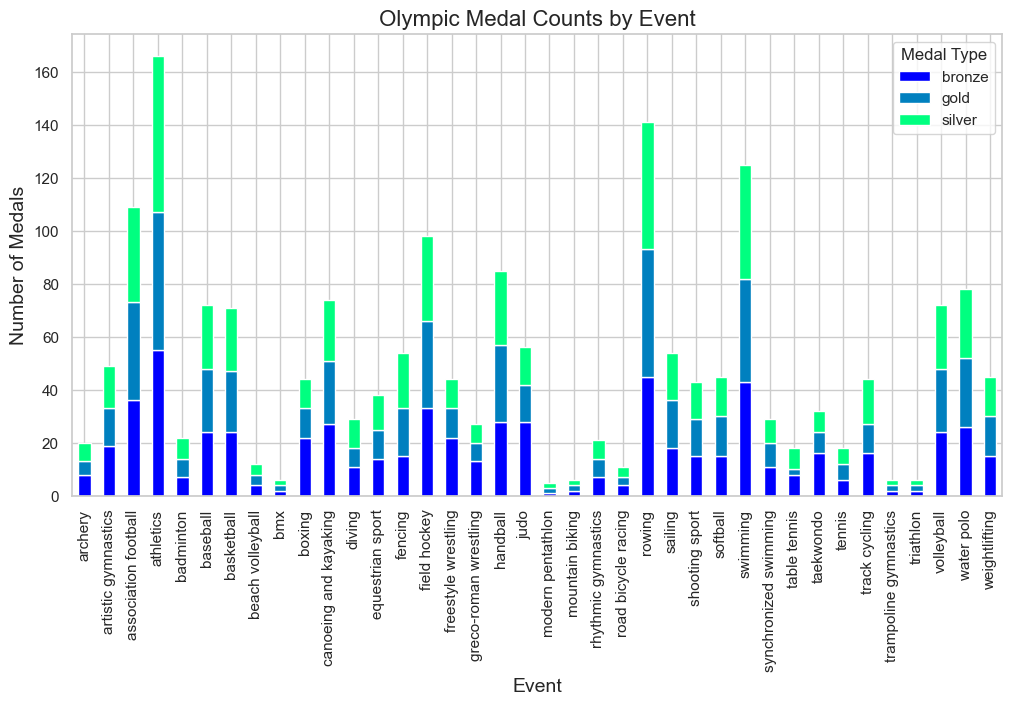

In [118]:
# Create the pivot table for medal counts per event
medal_counts = olympic_df_clean.pivot_table(index="Event", 
                                            columns="Medal", 
                                            values="medalist_name", 
                                            aggfunc="count", 
                                            fill_value=0)

# Reset index to make 'Event' a column for easy plotting
medal_counts = medal_counts.reset_index()

# Set up the plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plotting the bar chart
medal_counts = olympic_df_clean.pivot_table(index="Event", columns="Medal", values="medalist_name", aggfunc="count", fill_value=0)

#  Plotting a stacked bar chart of medal counts per event
medal_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="winter")

# Adding title and labels
plt.title("Olympic Medal Counts by Event", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.legend(title="Medal Type")
plt.show()

              medalist_name                  Event   Medal Gender
177            Bair Badënov                archery  bronze   male
676           Ilario Di Buò                archery  silver   male
682            Im Dong-hyun                archery    gold   male
760               Jiang Lin                archery  bronze   male
920          Lee Chang-hwan                archery    gold   male
...                     ...                    ...     ...    ...
130932        Steeve Guénot  greco-roman wrestling    gold   male
131159  Yannick Szczepaniak  greco-roman wrestling  bronze   male
131162       Yavor Yanakiev  greco-roman wrestling  bronze   male
131200      Yury Patrikeyev  greco-roman wrestling  bronze   male
131234         Zoltán Fodor  greco-roman wrestling  silver   male

[1875 rows x 4 columns]


<Figure size 1400x800 with 0 Axes>

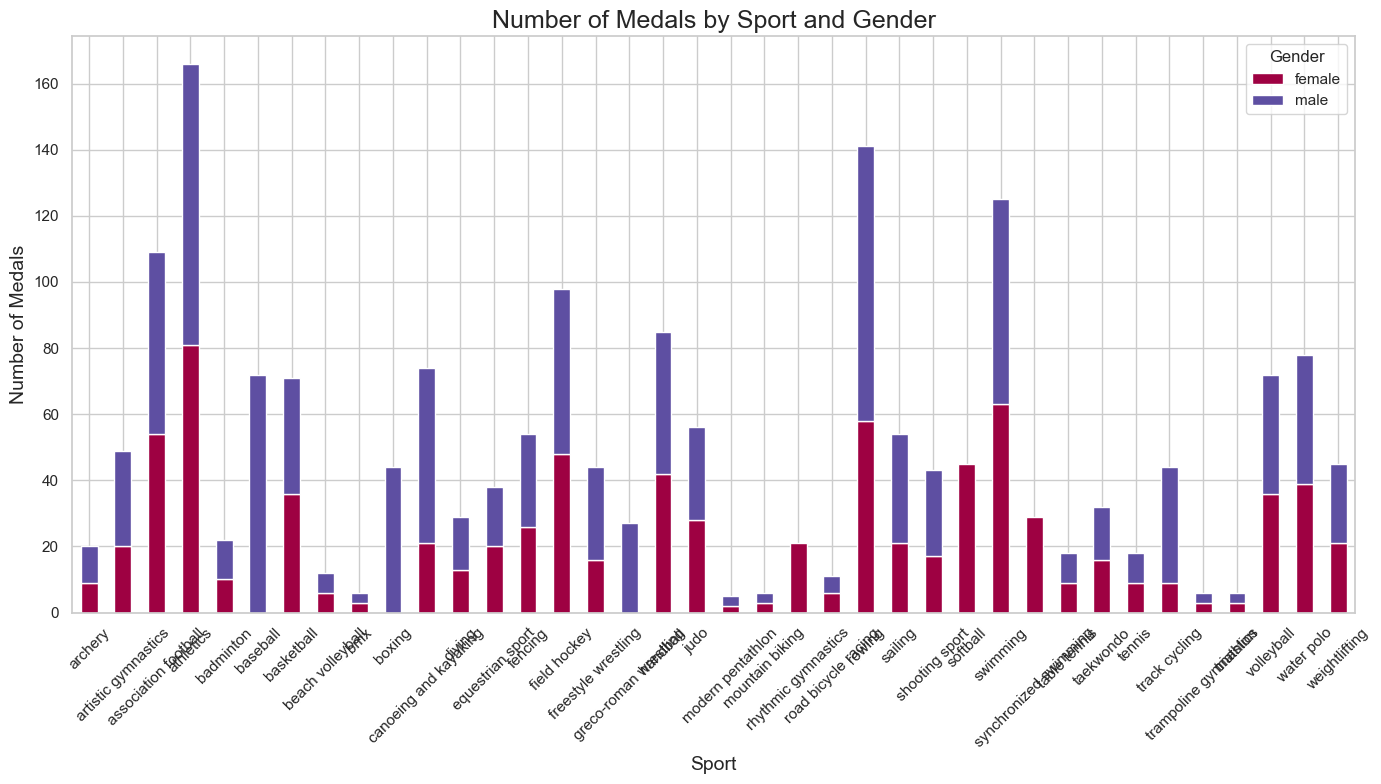

In [123]:
olympic_df_clean = olympic_df_clean.dropna()
print(olympic_df_clean)

# Group the data by sport and gender, and count the number of medals
sport_medal_counts = olympic_df_clean.groupby(['Event', 'Gender']).size().unstack().fillna(0)

# Set the visual style
sns.set(style="whitegrid")

# Create a figure and axis for the plot
plt.figure(figsize=(14, 8))

# Plot the stacked bar graph
sport_medal_counts.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(14, 8))

# Add title and labels
plt.title("Number of Medals by Sport and Gender", fontsize=18)
plt.xlabel("Sport", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show the plot
plt.tight_layout()
plt.show()


## Aggregation ##
Aggregation is the process of combining or summarizing data to produce a single result or a collection of summarized results. In data analysis, aggregation typically involves applying functions like sum, mean, count, min, max, or median to groups of data to obtain meaningful insights.

It is significant as aggregation helps reduce large and complex datasets into manageable summaries. Instead of analyzing thousands of individual records, the user can look at grouped results that provide a clear picture. Such data can also reveal trends, correlations, and patterns that are not obvious when looking at raw data. For example, aggregating medal data by total count helps identify which Olympic sports involve more athletes and possibly its popularity or whether they are group or individual sports. In this way, aggregated statistics, such as the the total number of medals by sport, make it easier to compare groups and draw conclusions.

In [122]:
# Use pivot_table() to count total Olympic medals by event
olympic_df_clean.pivot_table(index="Event", 
                             columns="Medal", 
                             values="medalist_name", 
                             aggfunc="count", 
                             fill_value=0)

Medal,bronze,gold,silver
Event,,,
archery,8,5,7
artistic gymnastics,19,14,16
association football,36,37,36
athletics,55,52,59
badminton,7,7,8
baseball,24,24,24
basketball,24,23,24
beach volleyball,4,4,4
bmx,2,2,2
